In [1]:
!pip install ultralytics


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from ultralytics import YOLO

model = YOLO("D://Thesis//Mass_Line_Extraction//yolo-checkpoints//last_98_best_epoch.pt")

In [3]:
from pathlib import Path
import secrets      # cryptographically‑secure RNG
import base64       # for compact ASCII/“number + letter” output
import cv2
import os

def random_name(n_bytes: int = 16) -> str:
    # ① secure random bytes → ② Base32 text → ③ strip padding “=”
    token = base64.b32encode(secrets.token_bytes(n_bytes)).decode('ascii').rstrip('=')
    return f"{token}"

# Seperating Handwritten and Printed

In [12]:
#Save graph
def get_name(image_path):    
    base_name = os.path.basename(image_path)  # e.g., "example.jpg"
    return base_name
    #Saving graphs
    # annotated_img = result.plot()
    # output_path_yolo_result = f'D://Thesis//Mass_Line_Extraction//yolo_results//{base_name}'
    # cv2.imwrite(output_path_yolo_result,annotated_img)

In [17]:
#Save graph
def save_graph(image_path, result):    
    base_name = os.path.basename(image_path)  # e.g., "example.jpg"
    annotated_img = result.plot()
    output_path_yolo_result = f'D://Thesis//Mass_Line_Extraction//yolo_results//{base_name}'
    cv2.imwrite(output_path_yolo_result,annotated_img)

# Looping through the folders and cropping images as well as saving the graphs

In [26]:
import os
import cv2

# Update your base directories
base_input_dir = r"D://Thesis//Mass_Line_Extraction//IAM//data"
base_output_handwritten = r"D://Thesis//Mass_Line_Extraction//output_images//handwritten"
base_output_printed = r"D://Thesis//Mass_Line_Extraction//output_images//printed"
base_graph_folder = r"D://Thesis//Mass_Line_Extraction//yolo_results"

def seperate_handwritten_printed_using_yolo(image_path, folder_name):
    results = model([image_path])
    image = cv2.imread(image_path)
    base_name = os.path.basename(image_path)

    for result in results:
        boxes = result.boxes
        cls = boxes.cls.cpu().numpy()
        xyxy = boxes.xyxy.cpu().numpy()

        class6_boxes = [box for i, box in enumerate(xyxy) if cls[i] == 6]
        class9_boxes = [box for i, box in enumerate(xyxy) if cls[i] == 9]

        def ensure_and_save_crop(box, root_folder):
            x1, y1, x2, y2 = map(int, box)
            cropped = image[y1:y2, x1:x2]
            subfolder = os.path.join(root_folder, folder_name)
            subfolder_graph = os.path.join(base_graph_folder, folder_name)
            os.makedirs(subfolder, exist_ok=True)
            os.makedirs(subfolder_graph, exist_ok=True)
            graph = result.plot()
            cv2.imwrite(os.path.join(subfolder, f"{base_name}"), cropped)
            cv2.imwrite(os.path.join(subfolder_graph, f"{base_name}"), graph)
            

        if class6_boxes:
            ensure_and_save_crop(class6_boxes[0], base_output_handwritten)
            if class9_boxes:
                class9_boxes.sort(key=lambda b: (b[2]-b[0]) * (b[3]-b[1]), reverse=True)
                if len(class9_boxes)==0:
                    continue
                elif len(class9_boxes)>=2:
                    ensure_and_save_crop(class9_boxes[1], base_output_printed)
                else:
                    ensure_and_save_crop(class9_boxes[0], base_output_printed)
        else:
            if len(class9_boxes) >= 2:
                class9_boxes.sort(key=lambda b: (b[2]-b[0]) * (b[3]-b[1]), reverse=True)
                ensure_and_save_crop(class9_boxes[0], base_output_handwritten)
                ensure_and_save_crop(class9_boxes[1], base_output_printed)
            else:
                print(f"Skipped {image_path} — Not enough class 9 boxes")

def process_all_images():
    for root, dirs, files in os.walk(base_input_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                image_path = os.path.join(root, file)
                folder_name = os.path.basename(root)
                try:
                    seperate_handwritten_printed_using_yolo(image_path, folder_name)
                except Exception as e:
                    print(f"Error processing {image_path}: {e}")

# Run
process_all_images()


0: 640x448 1 Page-header, 1 Section-header, 3 Texts, 140.9ms
Speed: 3.2ms preprocess, 140.9ms inference, 7.8ms postprocess per image at shape (1, 3, 640, 448)

0: 640x448 2 Page-headers, 1 Section-header, 3 Texts, 6.6ms
Speed: 3.0ms preprocess, 6.6ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 448)

0: 640x448 1 Page-footer, 1 Page-header, 1 Section-header, 2 Texts, 6.6ms
Speed: 2.2ms preprocess, 6.6ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 448)

0: 640x448 2 Page-headers, 1 Section-header, 3 Texts, 17.8ms
Speed: 2.7ms preprocess, 17.8ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 448)

0: 640x448 1 Page-header, 1 Section-header, 3 Texts, 29.8ms
Speed: 119.6ms preprocess, 29.8ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 448)

0: 640x448 1 Page-header, 1 Section-header, 3 Texts, 6.7ms
Speed: 2.2ms preprocess, 6.7ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 448)

0: 640x448 1 Page-header, 1 Section-

In [15]:
input_dir = Path(r"D://Thesis//Mass_Line_Extraction//IAM//data//000")
output_dir_printed = Path(r"E://Mass_Line_Extraction//output_images//printed")
output_dir_handwritten = Path(r"E://Mass_Line_Extraction//output_images//handwritten")

image_extensions = {".png", ".jpg", ".jpeg", ".bmp", ".tif", ".tiff"}

for image_file in input_dir.iterdir():
    if image_file.suffix.lower() in image_extensions:
        seperate_handwritten_printed_using_yolo(image_file)


0: 640x448 1 Page-header, 1 Section-header, 3 Texts, 50.0ms
Speed: 3.0ms preprocess, 50.0ms inference, 9.3ms postprocess per image at shape (1, 3, 640, 448)

0: 640x448 2 Page-headers, 1 Section-header, 3 Texts, 33.7ms
Speed: 6.4ms preprocess, 33.7ms inference, 8.4ms postprocess per image at shape (1, 3, 640, 448)

0: 640x448 1 Page-footer, 1 Page-header, 1 Section-header, 2 Texts, 134.7ms
Speed: 3.4ms preprocess, 134.7ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 448)

0: 640x448 2 Page-headers, 1 Section-header, 3 Texts, 7.4ms
Speed: 2.3ms preprocess, 7.4ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 448)

0: 640x448 1 Page-header, 1 Section-header, 3 Texts, 6.7ms
Speed: 2.1ms preprocess, 6.7ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 448)

0: 640x448 1 Page-header, 1 Section-header, 3 Texts, 6.7ms
Speed: 2.0ms preprocess, 6.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 448)

0: 640x448 1 Page-header, 1 Section-he

# Individual output result printing

In [ ]:
image_path = "D://Thesis//Mass_Line_Extraction//test//a01-072x.png"
results = model(image_path)
# save_graph(image_path,results[0])


image 1/1 D:\Thesis\Mass_Line_Extraction\test\a01-072x.png: 640x448 2 Page-headers, 1 Section-header, 2 Texts, 31.5ms
Speed: 6.0ms preprocess, 31.5ms inference, 135.3ms postprocess per image at shape (1, 3, 640, 448)


# Checking for individual problematic image

In [3]:
def testing(image_path):

# Inference result format: [x1, y1, x2, y2, confidence, class_id]
# Replace this with actual YOLO inference output
    results = model([image_path])

# Load your image
    image = cv2.imread(image_path)
    cnt = 0
    # Process results
    for result in results:
        boxes = result.boxes  # Get detected boxes
        cls = boxes.cls.cpu().numpy()  # Get class indices
        xyxy = boxes.xyxy.cpu().numpy()  # Get bounding boxes in xyxy format

        # Collect boxes of class 9
        class9_boxes = [box for i, box in enumerate(xyxy) if cls[i] == 9]

        # Sort boxes by Y-axis (y1 coordinate)
        class9_boxes.sort(key=lambda b: b[1])

        # Make sure there are exactly 2 class 9 boxes
        if len(class9_boxes) != 2:
            print("Expected exactly 2 boxes of class 9. Found:", len(class9_boxes))
            return False

In [ ]:
input_dir = Path(r"D://Thesis//Mass_Line_Extraction//test//tempo//a01-072x.png")
output_dir_printed = Path(r"E://Mass_Line_Extraction//output_images//printed")
output_dir_handwritten = Path(r"E://Mass_Line_Extraction//output_images//handwritten")

image_extensions = {".png", ".jpg", ".jpeg", ".bmp", ".tif", ".tiff"}

for image_file in input_dir.iterdir():
    if image_file.suffix.lower() in image_extensions:
        if(testing(image_file) == False):
            print(image_file)
            break


0: 640x448 2 Page-headers, 1 Section-header, 3 Texts, 112.1ms
Speed: 3.4ms preprocess, 112.1ms inference, 11.1ms postprocess per image at shape (1, 3, 640, 448)
Expected exactly 2 boxes of class 9. Found: 3
IAM\data\000\a01-000u.png



image 1/1 D:\Thesis\Mass_Line_Extraction\test\a01-072x.png: 640x448 2 Page-headers, 1 Section-header, 2 Texts, 7.1ms
Speed: 2.1ms preprocess, 7.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


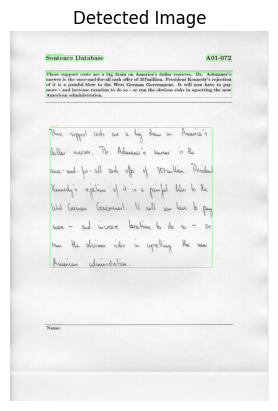

In [7]:
from ultralytics import YOLO
import cv2

# Load the model
model = YOLO("D://Thesis//Mass_Line_Extraction//yolo-checkpoints//last_98_best_epoch.pt")

# Image path
image_path = "D://Thesis//Mass_Line_Extraction//test//a01-072x.png"

# Run inference
results = model(image_path)

# Load the image using OpenCV
image = cv2.imread(image_path)

# Get detections (assume first image in batch)
boxes = results[0].boxes

# Draw each box
for box in boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])  # convert to int
    conf = float(box.conf[0])              # confidence score
    cls_id = int(box.cls[0])               # class index
    label = f"{model.names[cls_id]} {conf:.2f}"  # class label

    # Draw rectangle and label
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(image, label, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

from matplotlib import pyplot as plt

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show with matplotlib
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Detected Image")
plt.show()
